In [1]:
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt

In [3]:
import os 
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image

In [4]:
img=image.load_img('dataset/train/andrew/1.jpg')

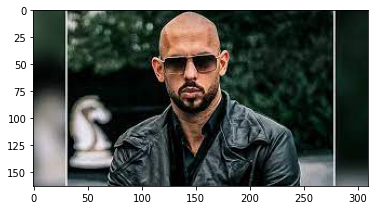

In [5]:
plt.imshow(img)

In [6]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

In [43]:
train_data_dir = 'dataset/train'
validation_data_dir = 'dataset/val'

In [44]:
train=ImageDataGenerator(rescale=1/255.0)
val=ImageDataGenerator(rescale=1/255.0)

In [45]:
train_dataset=train.flow_from_directory('dataset/train',target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary'
                                       )

Found 14 images belonging to 2 classes.


In [46]:
val_dataset=val.flow_from_directory('dataset/val',target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary'
                                       )

Found 10 images belonging to 2 classes.


In [47]:
train_dataset.class_indices

{'andrew': 0, 'notandrew': 1}

In [48]:
model=tf.keras.models.Sequential([
   
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',strides=(1,1), padding='same' ,input_shape=(200,200,3)), 
    tf.keras.layers.Conv2D(64,(3,3),activation='relu',strides=(1,1), padding='same' ), 
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',strides=(1,1), padding='same'), 
    tf.keras.layers.Conv2D(128,(3,3),activation='relu',strides=(1,1), padding='same'), 
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',strides=(1,1), padding='same'), 
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',strides=(1,1), padding='same'), 
    tf.keras.layers.Conv2D(256,(3,3),activation='relu',strides=(1,1), padding='same'), 
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Conv2D(512,(3,3),activation='relu',strides=(1,1), padding='same'), 
    tf.keras.layers.Conv2D(512,(3,3),activation='relu',strides=(1,1), padding='same'), 
    tf.keras.layers.Conv2D(512,(3,3),activation='relu',strides=(1,1), padding='same'), 
    tf.keras.layers.MaxPooling2D((2,2),strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dense(4096,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
    
    
    
    

    
    
                          
    
])

In [49]:
model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.RMSprop(lr=0.001),
             metrics=['accuracy'])

C:\Users\fazalerabbi\anaconda3\envs\fazal\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
modelfit=model.fit(train_dataset,steps_per_epoch=5,epochs=30,
                  validation_data=val_dataset)

Epoch 1/30
5/5 [==============================] - 16s 3s/step - loss: 8742.4580 - accuracy: 0.3571 - val_loss: 1.0300 - val_accuracy: 0.5000
Epoch 2/30
5/5 [==============================] - 14s 3s/step - loss: 0.9805 - accuracy: 0.2143 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 3/30
5/5 [==============================] - 15s 3s/step - loss: 0.7191 - accuracy: 0.5714 - val_loss: 0.6972 - val_accuracy: 0.5000
Epoch 4/30
5/5 [==============================] - 15s 3s/step - loss: 0.7137 - accuracy: 0.2857 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/30
5/5 [==============================] - 14s 3s/step - loss: 0.6989 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 6/30
5/5 [==============================] - 15s 3s/step - loss: 0.6989 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 7/30
5/5 [==============================] - 15s 3s/step - loss: 0.6951 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 8/30
5/5 [===============